Q2：

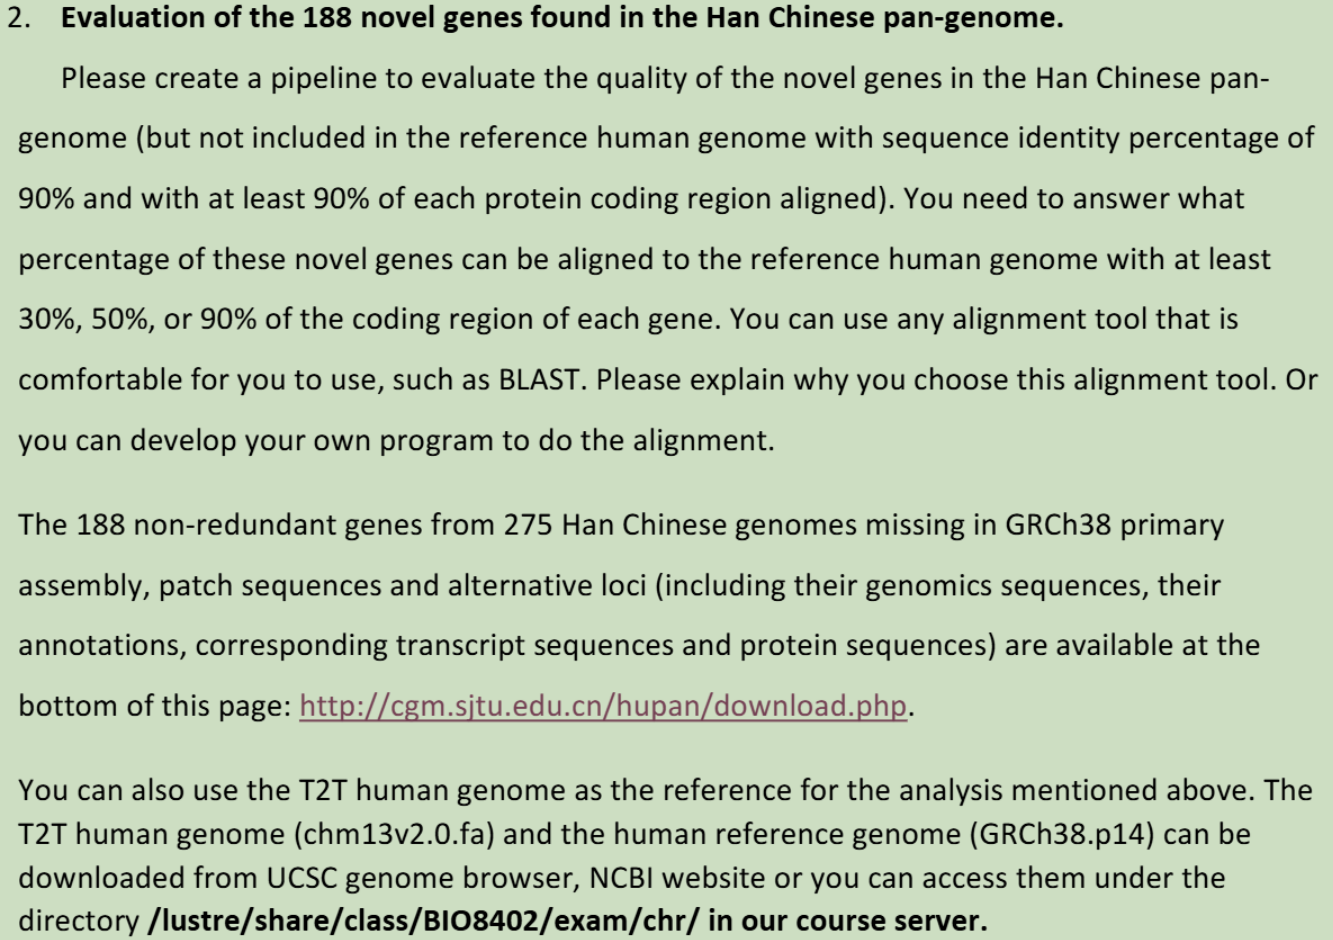

创建一个流程，用于评估在汉族中国人泛基因组中发现的 188 个新基因的质量。这些新基因未包含在参考人类基因组中，且序列一致性百分比为 90%，每个蛋白质编码区至少有 90% 比对。需要确定这些新基因中有多少比例分别能与参考人类基因组在编码区的至少 30%、50% 或 90% 的区域比对。可以选择使用如 BLAST 等比对工具，或自己开发比对程序

对新基因与参考基因组相似性评估，评估新基因在参考基因组中的比对情况

In [1]:
import mermaid as md

In [3]:
%%mermaidjs
graph LR
A[下载新基因序列] --> B[比对到GRCh38]
B --> C[统计覆盖度30%/50%/90%的基因比例]

* 执行比对 ：将 188 个新基因的序列与参考人类基因组序列进行比对，记录每个基因在参考基因组中的比对结果，包括比对上的区域在编码区所占的比例。
* 统计分析 ：统计在不同比例阈值（30%、50%、90%）下，能与参考基因组对齐的新基因的数量及所占比例，以评估新基因的质量

使用比对工具DIAMOND（https://github.com/bbuchfink/diamond）

为什么选择BLAST类一代比对工具而不是Bowtie2类二代比对工具？

数据类型：在这个问题中，需要比对的是新基因序列（较长的序列），而不是二代测序产生的短读序列。因此，BLAST更适合用于这种长序列的比对。 

比对目标：目标是评估新基因与参考基因组的比对覆盖度，这需要详细的比对结果来计算覆盖度。BLAST能够提供详细的比对信息，包括匹配区域、相似性等，这对于计算覆盖度非常关键。

精度需求：虽然BLAST的速度较慢，但它的精度更高。在评估新基因的比对覆盖度时，精度比速度更重要。相比之下，Bowtie2虽然速度快，但无法提供足够的细节来满足这种精度需求。而且bowtie2等二代测序回帖比对工具更注重快速定位短读序列在参考基因组上的位置

！！！仅提供思路逻辑

计算每个基因的比丢覆盖度：

覆盖度 = (比对区域长度) / (query基因长度)

Python脚本统计覆盖度≥30%/50%/90%的基因数量

若覆盖度>90%说明可能是参考基因组注释遗漏的已知基因

覆盖度<30%的基因更可能是真正的新基因